/home/pbellec/env/psy3018/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
/home/pbellec/env/psy3018/lib/python3.8/site-packages/numpy/lib/npyio.py:2407: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


<AxesSubplot:xlabel='MG2', ylabel='Frequency'>

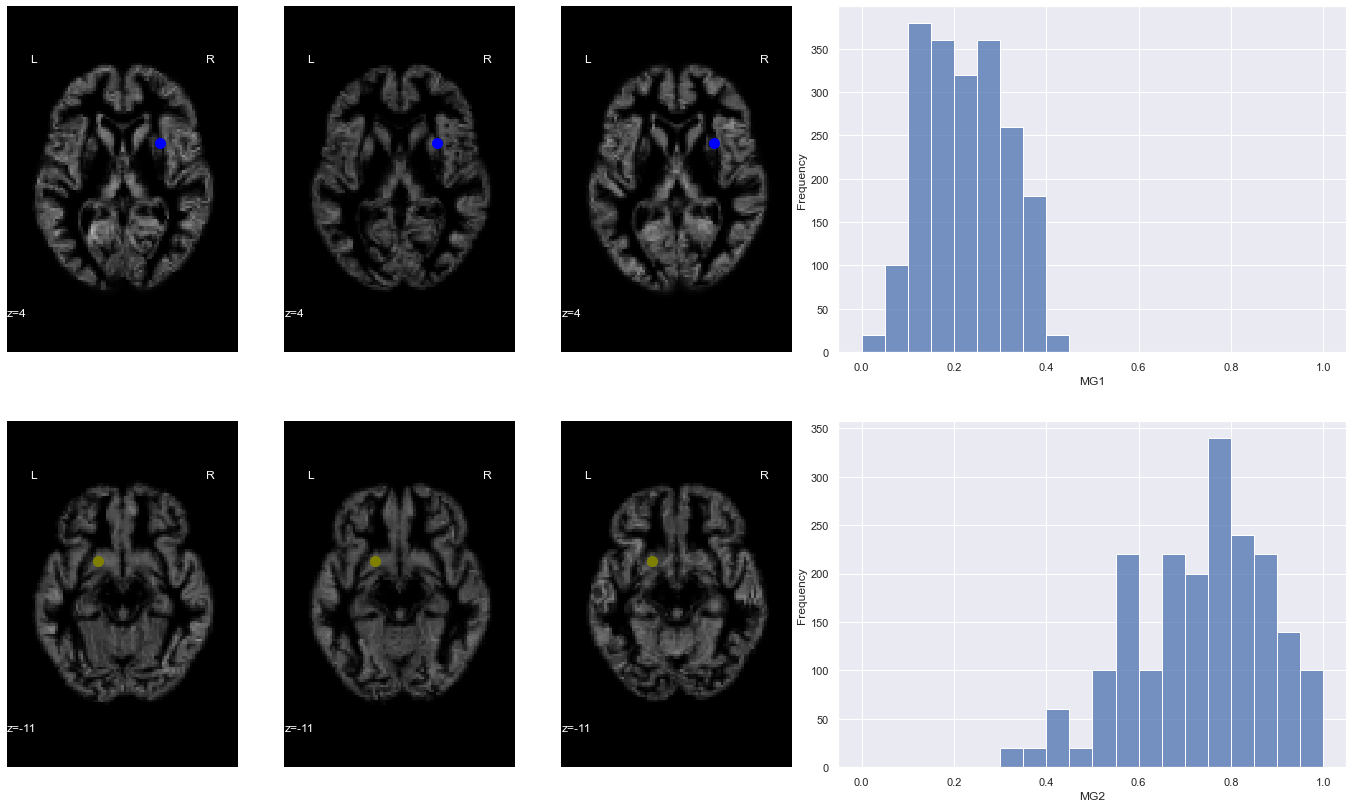

In [1]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiMasker
from nilearn.image import get_data

# Charge les données
n_subjects = 100  
oasis_dataset = datasets.fetch_oasis_vbm(n_subjects=n_subjects)
gray_matter_map_filenames = oasis_dataset.gray_matter_maps
age = oasis_dataset.ext_vars['age'].astype(float)
sex = oasis_dataset.ext_vars['mf'] == b'F'

# On convertit les données en pandas dataframe
# Deux voxels intéressants ont été sélectionnés
import pandas as pd
coords = np.array([[ 29.,  10.,   4.], [-19.,   8., -11.]])
colors = ['blue', 'olive']

from nilearn import input_data
masker = input_data.NiftiSpheresMasker(coords)
gm = masker.fit_transform(gray_matter_map_filenames)
subject_label = [f'sub-{num}' for num in range(n_subjects)]
df = pd.DataFrame({
    "subject_label": subject_label,
    "age": age,
    "sexe": oasis_dataset.ext_vars['mf'],
    "MG1": gm[:, 0],
    "MG2": gm[:, 1]
    })

df["sexe"] = df["sexe"].replace([b'F', b'M'], value=['femelle', 'male'])

# On génère la Figure
from nilearn import plotting
import seaborn as sns
fig = plt.figure(figsize=(24, 14))

for i in range(0, 6):        
    nx = np.floor_divide(i, 3)
    ny = np.remainder(i, 3)
    ax = plt.subplot2grid((2, 5), (nx, ny), colspan=1)
    roi_img = plotting.plot_anat(
        gray_matter_map_filenames[i], cut_coords=[coords[nx][2]], figure=fig,
        axes=ax, display_mode='z', colorbar=False)
    roi_img.add_markers([coords[nx]], colors[nx], 100)

sns.set_theme(style="darkgrid")
ax = plt.subplot2grid((2, 5), (0, 3), colspan=2)
sns.histplot(
    df["MG1"], ax=ax, binwidth=0.05, binrange=[0, 1], stat='frequency')

ax = plt.subplot2grid((2, 5), (1, 3), colspan=2)
sns.histplot(
    df["MG2"], ax=ax, binwidth=0.05, binrange=[0, 1], stat='frequency')


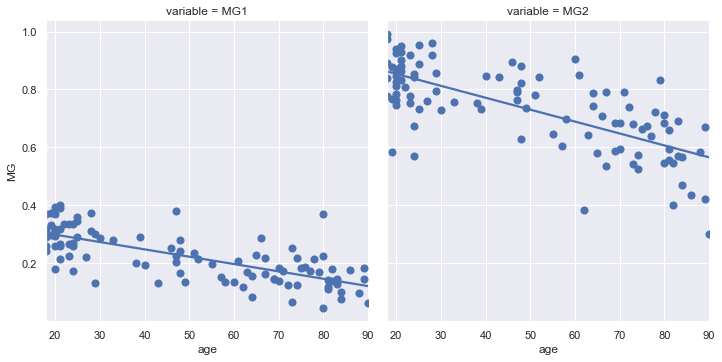

In [2]:
# On réorganise de DataFrame pour utiliser seaborn
df2 = df.melt(id_vars=["age", "sexe"], value_vars=["MG1", "MG2"], value_name="MG")
fig = sns.lmplot(x="age", y="MG", data=df2, col='variable',
           ci=None, scatter_kws={"s": 50, "alpha": 1})

<AxesSubplot:xlabel='age', ylabel='MG2'>

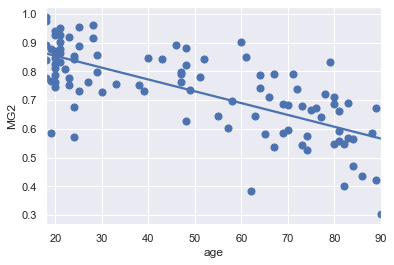

In [7]:
sns.regplot(x="age", y="MG2", data=df, ci=None, scatter_kws={"s": 50, "alpha": 1})

In [169]:
from nilearn.glm.second_level import make_second_level_design_matrix
design_df = df[["subject_label", "age", "sexe"]].replace(['femelle', 'male'], value=[0, 1])
design_matrix = make_second_level_design_matrix(
    subject_label,
    design_df
    )
from nilearn.glm.second_level import SecondLevelModel
second_level_model = SecondLevelModel(smoothing_fwhm=5.0)
second_level_model = second_level_model.fit(gray_matter_map_filenames,
                                            design_matrix=design_matrix)


In [178]:
t_map = second_level_model.compute_contrast(second_level_contrast="age", output_type="effect_size")


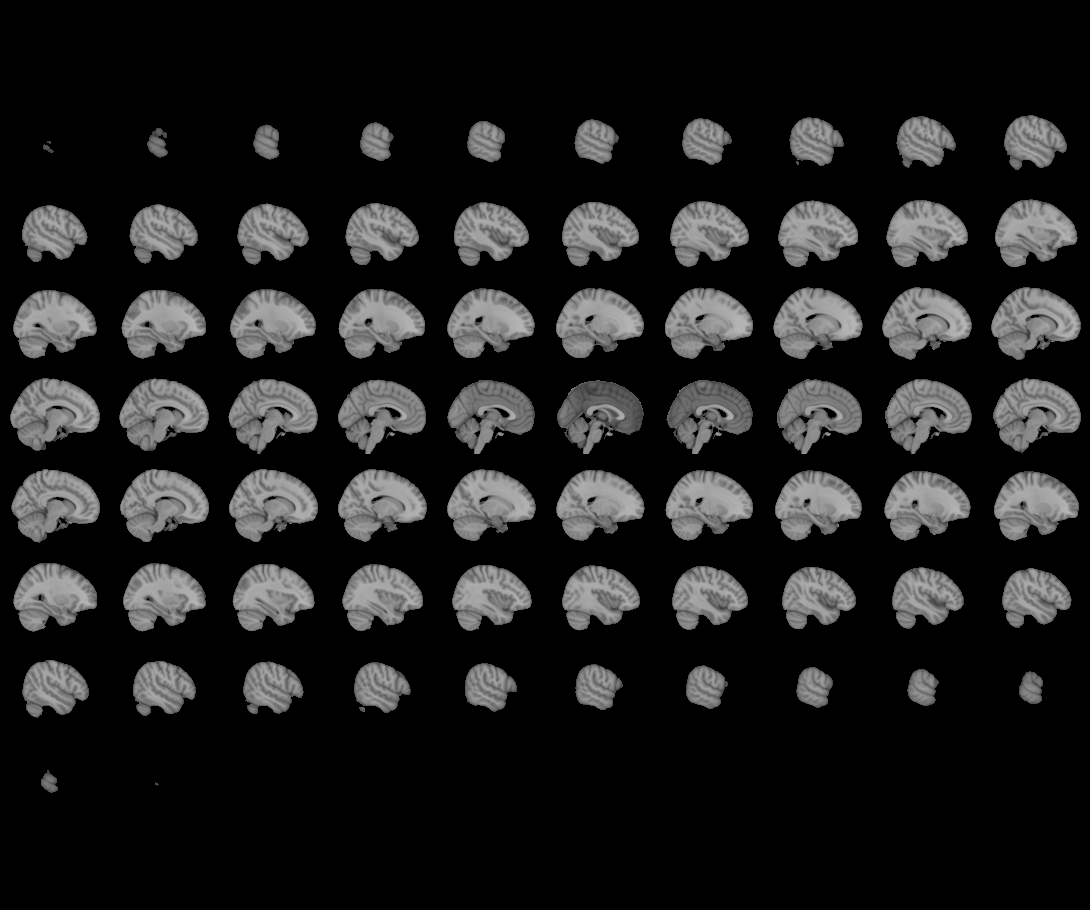
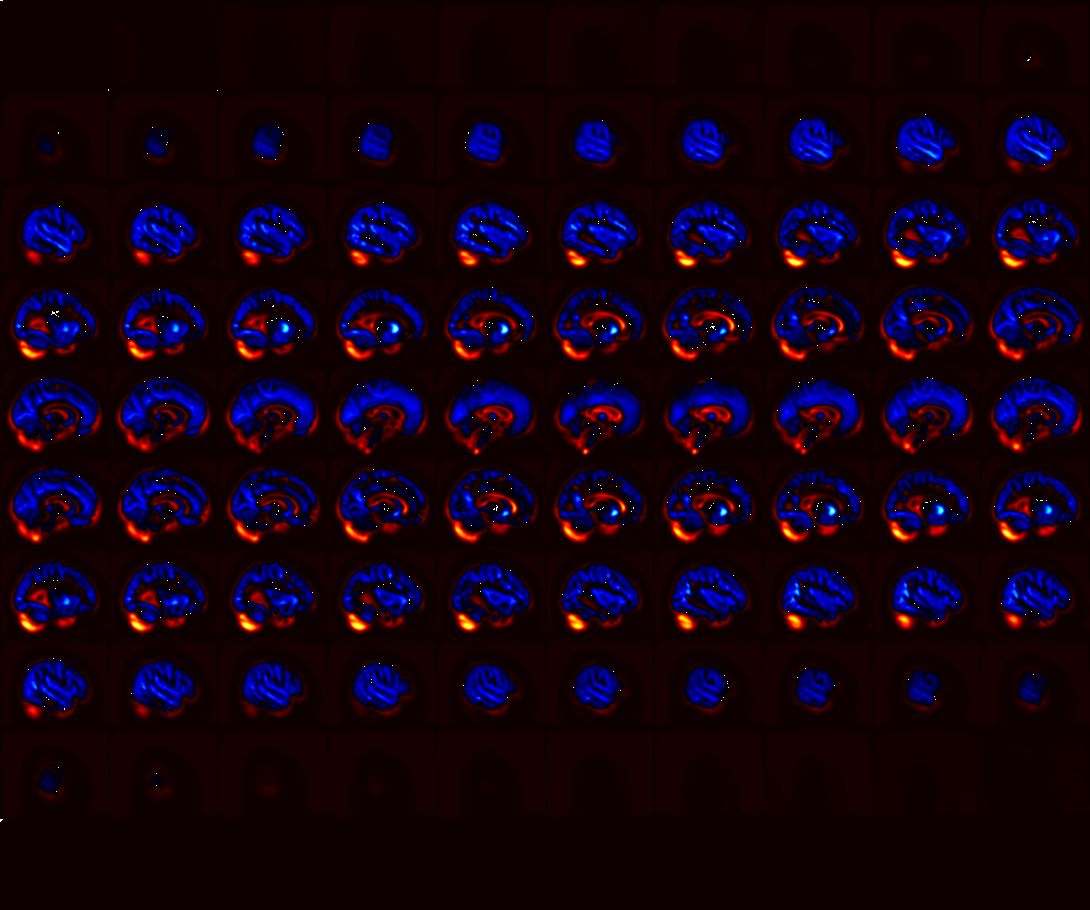

In [179]:
from nilearn.plotting import view_img
view_img(t_map)

In [175]:
second_level_model.compute_contrast?

<AxesSubplot:xlabel='MG2', ylabel='Frequency'>

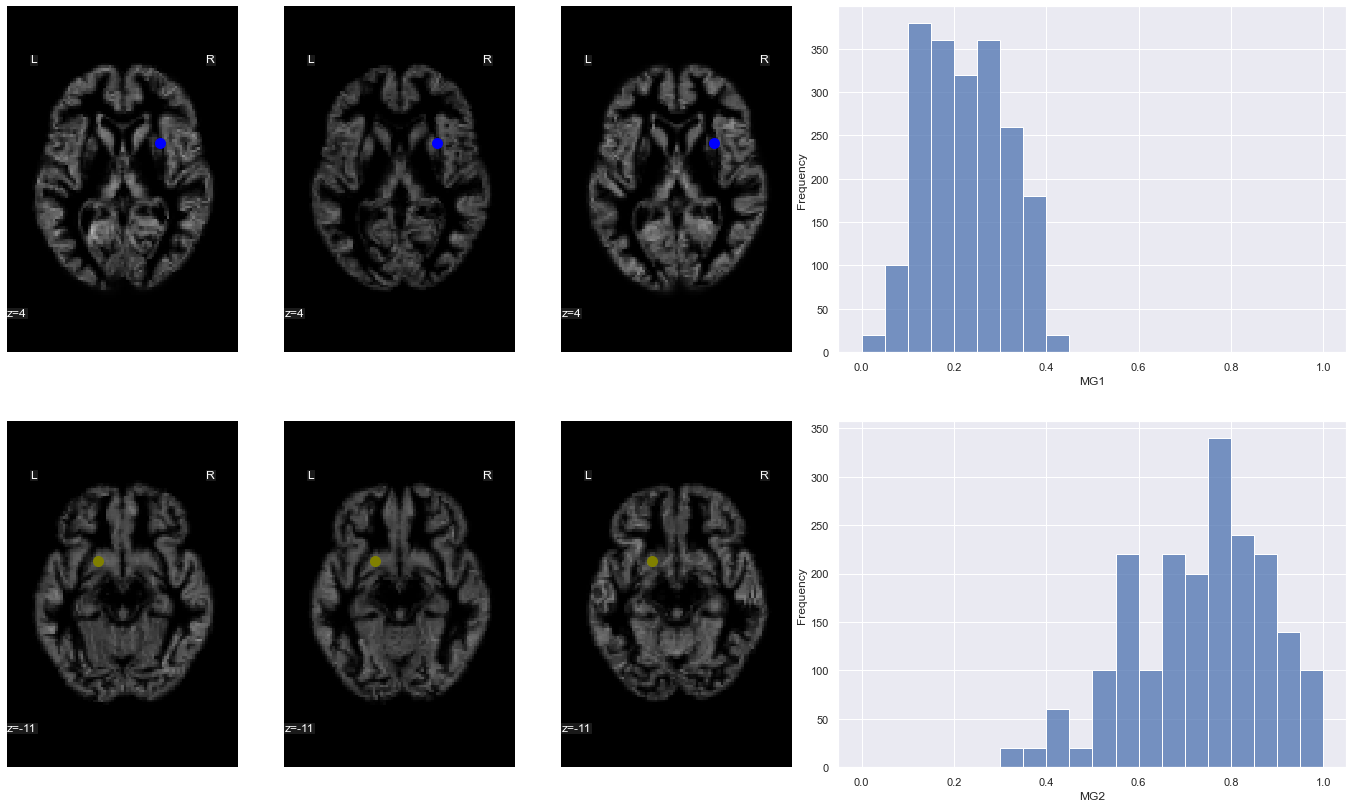

In [100]:
from nilearn import plotting
import seaborn as sns
fig = plt.figure(figsize=(24, 14))

for i in range(0, 6):        
    nx = np.floor_divide(i, 3)
    ny = np.remainder(i, 3)
    ax = plt.subplot2grid((2, 5), (nx, ny), colspan=1)
    roi_img = plotting.plot_anat(
        gray_matter_map_filenames[i], cut_coords=[coords[nx][2]], figure=fig,
        axes=ax, display_mode='z', colorbar=False)
    roi_img.add_markers([coords[nx]], colors[nx], 100)

sns.set_theme(style="darkgrid")
ax = plt.subplot2grid((2, 5), (0, 3), colspan=2)
sns.histplot(
    df["MG1"], ax=ax, binwidth=0.05, binrange=[0, 1], stat='frequency')

ax = plt.subplot2grid((2, 5), (1, 3), colspan=2)
sns.histplot(
    df["MG2"], ax=ax, binwidth=0.05, binrange=[0, 1], stat='frequency')

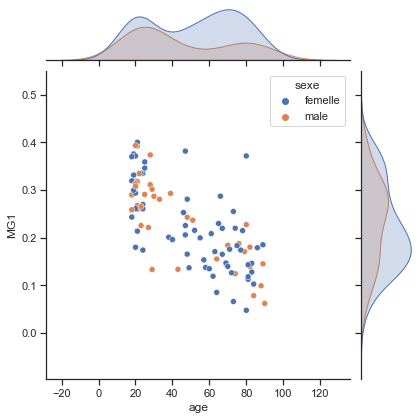

In [125]:
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
fig = sns.jointplot(
    data=df,
    x="age", y="MG1", hue="sexe",
    kind="scatter",
)

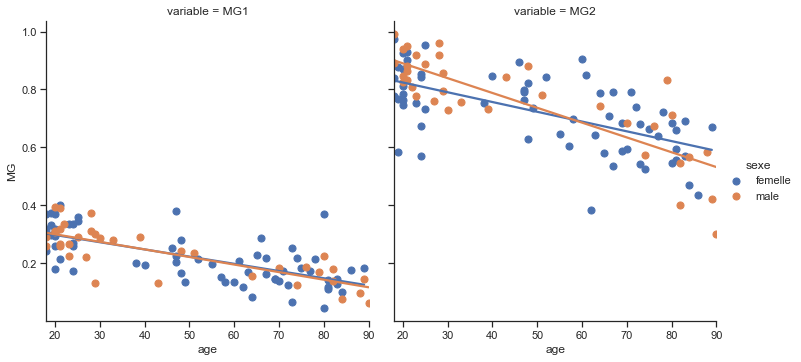

In [164]:
df2 = df.melt(id_vars=["age", "sexe"], value_vars=["MG1", "MG2"], value_name="MG")
fig = sns.lmplot(x="age", y="MG", data=df2, col='variable', hue='sexe',
           ci=None, scatter_kws={"s": 50, "alpha": 1})

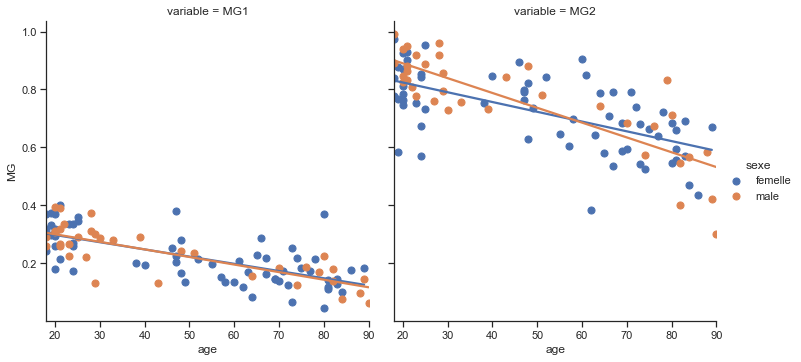

In [166]:
fig.fig

In [ ]:
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
fig = sns.jointplot(
    data=df,
    x="age", y="MG2", hue="sexe",
    kind="scatter",
)

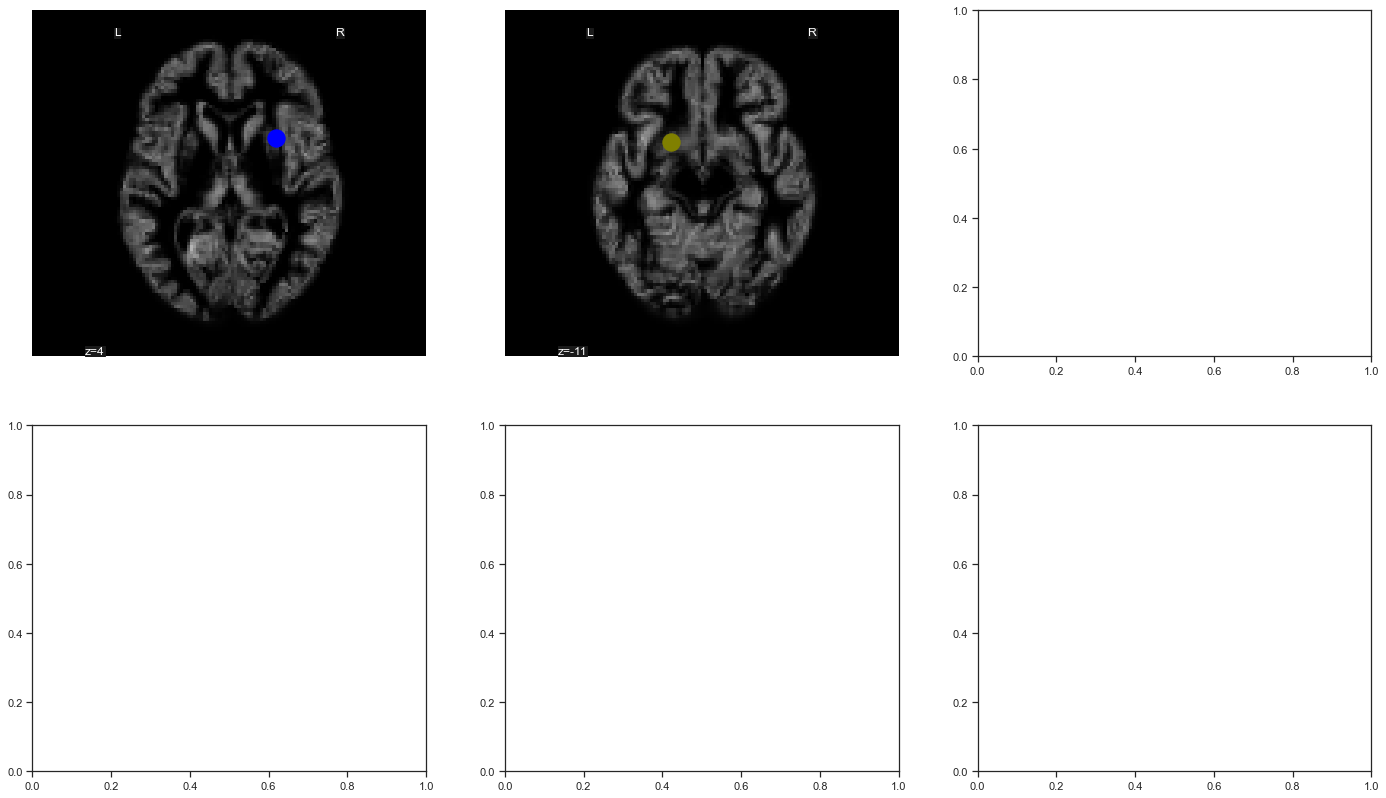

In [67]:
import seaborn as sns

df = pd.DataFrame({"age": age, "sex": sex, "MG1": real_timeseries[:, 1], "MG2": real_timeseries[:, 1]})

# Extract grey matter density 
coords = np.array([[ 29.,  10.,   4.], [-19.,   8., -11.]])
colors = ['blue', 'olive']
bg_filename = gray_matter_map_filenames[0]

# plot the distribution and corresponding locations
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")

from nilearn import plotting
fig1, axs1 = plt.subplots(2, 3)
for i in range(0, 2):
    sns.displot(
        df, x="flipper_length_mm", col="species", row="sex",
        binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    )

    roi_img = plotting.plot_anat(
        bg_filename, cut_coords=[coords[i][2]], figure=fig1,
        axes=axs1[0, i], display_mode='z', colorbar=False)
    roi_img.add_markers([coords[i]], colors[i], 300)

fig1.set_size_inches(24, 14)

In [3]:
mask_brain = datasets.fetch_icbm152_brain_gm_mask()

In [4]:
# Prétraitement (mask)
nifti_masker = NiftiMasker(
    mask_img=mask_brain,
    standardize=False,
    smoothing_fwhm=2,
    memory='nilearn_cache')  # cache options

# Normalise les données
gm_maps_masked = nifti_masker.fit_transform(gray_matter_map_filenames)

In [5]:
gm_maps_masked.shape

(100, 1529112)

/home/pbellec/env/psy3018/lib/python3.8/site-packages/nilearn/input_data/nifti_masker.py:329: UserWarning: No image provided to fit in NiftiMasker. Setting image to mask for reporting.
  warnings.warn(msg)


Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (197, 233, 189) affine: [[ 1. 0. 0. -98.] [ 0. 1. 0. -134.] [ 0. 0. 1. -72.] [ 0. 0. 0. 1.]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'' dim_info : 0 dim : [ 3 197 233 189 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : int8 bitpix : 8 slice_start : 0 pixdim : [1. 1. 1. 1. 1. 1. 1. 1.] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 0 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'' aux_file : b'' qform_code : unknown sform_code : aligned quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -98.0 qoffset_y : -134.0 qoffset_z : -72.0 srow_x : [ 1. 0. 0. -98.] srow_y : [ 0. 1. 0. -134.] srow_z : [ 0. 0. 1. -72.] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=nilearn_cache/joblib)
memory_level,1


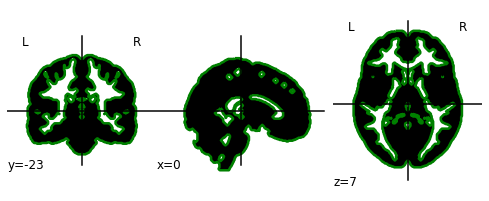

In [6]:
nifti_masker.generate_report()


In [7]:

from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold(threshold=.01)

gm_maps_thresholded = variance_threshold.fit_transform(gm_maps_masked)
gm_maps_masked = variance_threshold.inverse_transform(gm_maps_thresholded)
data = variance_threshold.fit_transform(gm_maps_masked)


In [8]:
# Modèle de régression massivement univarié
from nilearn.mass_univariate import permuted_ols
neg_log_pvals, t_scores_original_data, _ = permuted_ols(
    age, data,  # + intercept as a covariate by default
    n_perm=200,  # 1,000 in the interest of time; 10000 would be better
    verbose=1, # display progress bar
    n_jobs=1)  # can be changed to use more CPUs
signed_neg_log_pvals = neg_log_pvals * np.sign(t_scores_original_data)
signed_neg_log_pvals_unmasked = nifti_masker.inverse_transform(
    variance_threshold.inverse_transform(signed_neg_log_pvals))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.3s finished



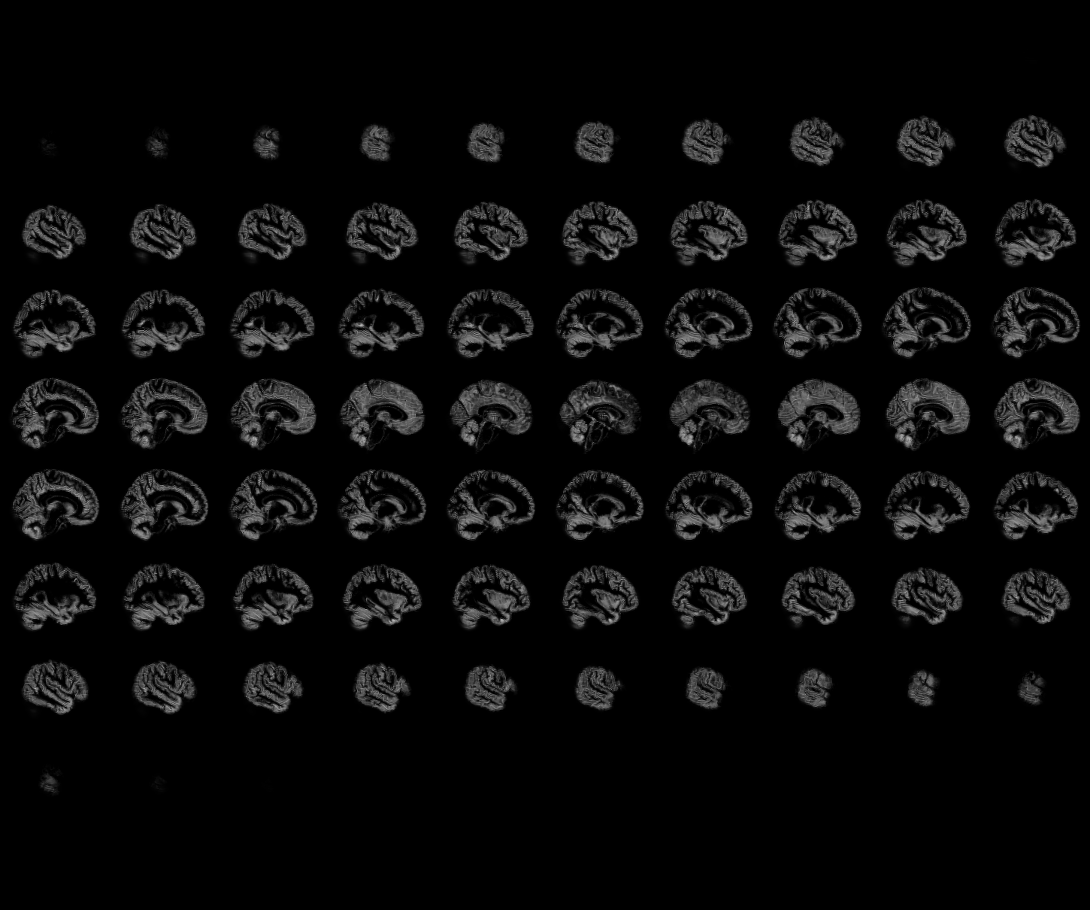
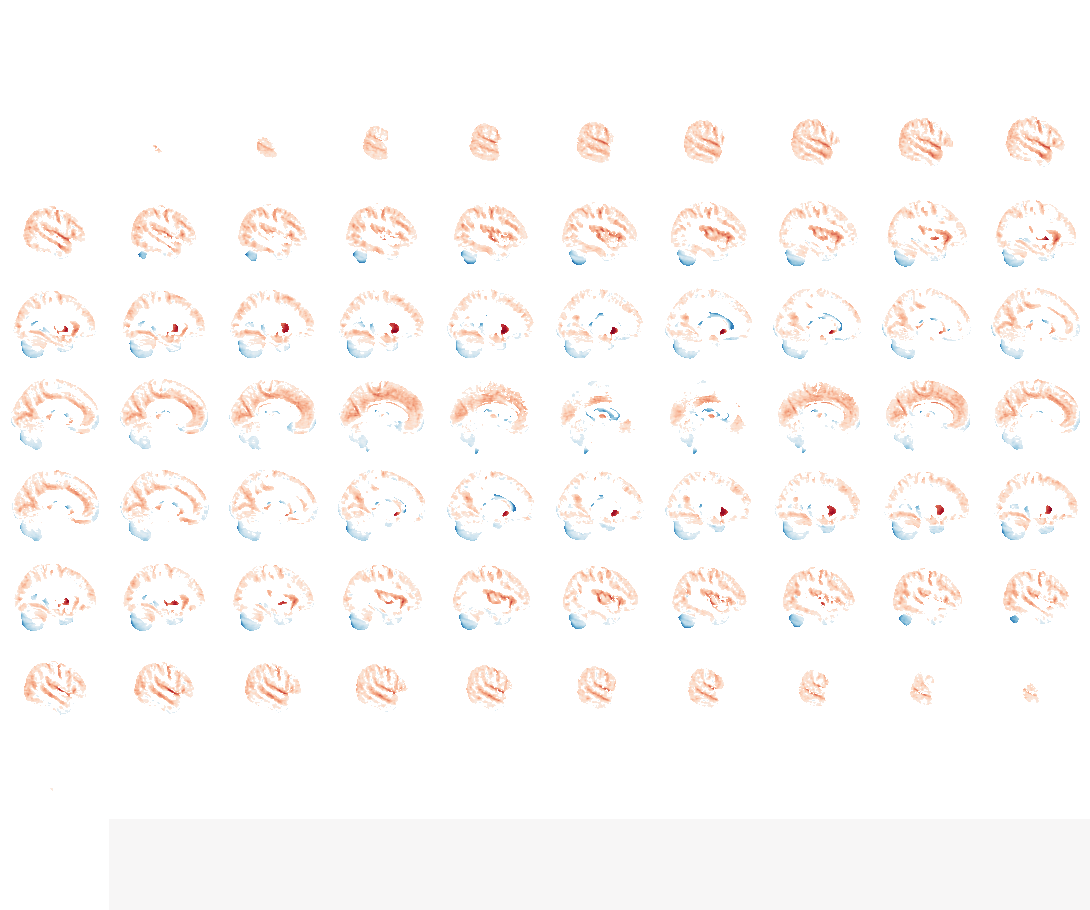

<Figure size 720x216 with 0 Axes>

In [34]:
from nilearn.plotting import plot_stat_map, view_img
# Visualise les résultats
threshold = -np.log10(0.1)  # 10% corrected

fig = plt.figure(figsize=(10, 3), facecolor='k')

cut_coords = [0, 0, 0]
#display = plot_stat_map(signed_neg_log_pvals_unmasked, bg_img=bg_filename,
#                        threshold=threshold, cmap=plt.cm.RdBu_r,
#                        cut_coords=cut_coords,
#                        figure=fig)
view_img(signed_neg_log_pvals_unmasked, bg_img=bg_filename,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        cut_coords=cut_coords,
                        figure=fig)

#title = ('Negative $\\log_{10}$ p-values'
#         '\n(Non-parametric + max-type correction)')
#display.title(title, y=1.2)
#plt.show()

In [27]:
# Extract activation clusters
t_map = signed_neg_log_pvals_unmasked = nifti_masker.inverse_transform(
    variance_threshold.inverse_transform(-t_scores_original_data))

from nilearn.reporting import get_clusters_table
table = get_clusters_table(t_map, stat_threshold=3.1,
                           cluster_threshold=20).set_index('Cluster ID', drop=True)

# get the 3 largest clusters' max x, y, and z coordinates
coords = table.loc[range(1, 4), ['X', 'Y', 'Z']].values



In [59]:
coords = np.array([[ 29.,  10.,   4.], [-19.,   8., -11.]])

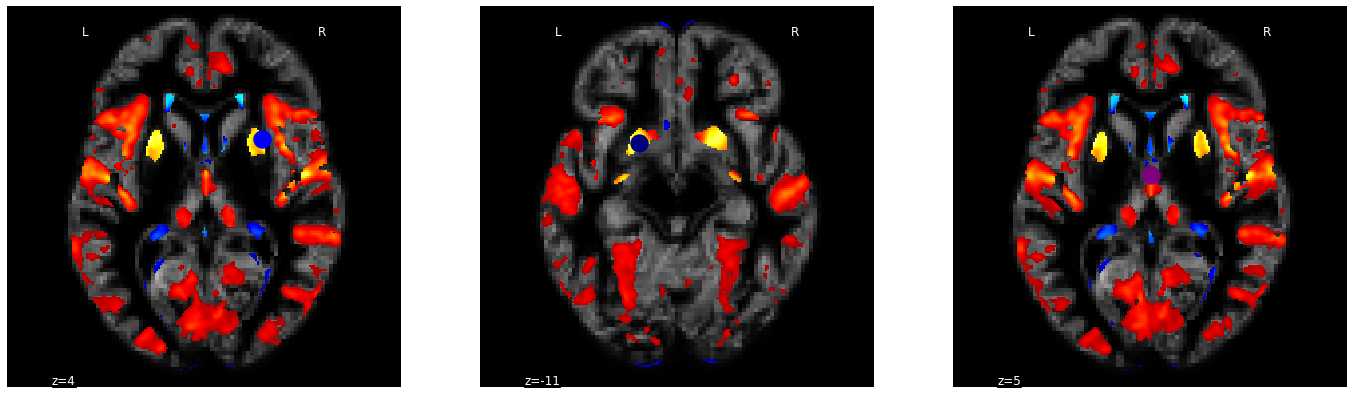

In [36]:
colors = ['blue', 'navy', 'purple', 'magenta', 'olive', 'teal']
# plot the time series and corresponding locations
from nilearn import plotting
fig1, axs1 = plt.subplots(1, 3)
for i in range(0, 3):
    roi_img = plotting.plot_stat_map(
        t_map, cut_coords=[coords[i][2]], threshold=3.1, figure=fig1,
        axes=axs1[i], display_mode='z', colorbar=False, bg_img=bg_filename)
    roi_img.add_markers([coords[i]], colors[i], 300)

fig1.set_size_inches(24, 7)

In [37]:
from nilearn import input_data
# extract time series from each coordinate
masker = input_data.NiftiSpheresMasker(coords)
gm = masker.fit_transform(gray_matter_map_filenames)
#predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

In [41]:
real_timeseries[:, 0].shape

(100,)

In [42]:
age.shape

(100,)

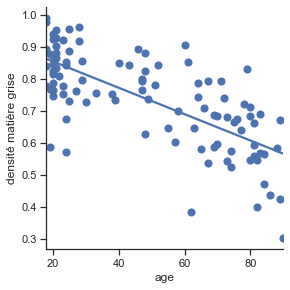

In [55]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="ticks")

df = pd.DataFrame({"age":age, "densité matière grise":real_timeseries[:, 1]})
# Show the results of a linear regression within each dataset
sns.lmplot(x="age", y="densité matière grise", data=df,
           ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})